### Importing the data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
#data_snp=np.genfromtxt("./ceph_hgdp_minor_code_XNA.betterAnnotated.csv",skip_header=1,dtype=int,delimiter=',')

In [3]:
df_snp=pd.read_csv("./ceph_hgdp_minor_code_XNA.betterAnnotated.csv")

In [4]:
df_snp

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488914,rs7761056,6,169420041,2,2,2,2,2,1,1,...,0,1,0,1,2,0,1,1,1,0
488915,rs2081188,19,21180835,1,0,2,1,1,1,1,...,2,2,0,1,1,1,1,2,2,2
488916,rs2951747,12,11518610,2,2,2,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
488917,rs2929374,3,19923057,1,1,1,1,0,2,1,...,1,1,1,1,2,2,1,2,2,2


In [5]:
(df_snp.isnull().sum(axis=1).values).sum()

0

In [6]:
df_clinical=pd.read_csv("./ceph_hgdp_minor_code_XNA.sampleInformation.csv")

In [7]:
df_clinical

,ID,Gender,Population,Geographic.origin,Geographic.area,region,distance,latitude,longtitude
0,HGDP00448,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
1,HGDP00479,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
2,HGDP00985,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
3,HGDP01094,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
4,HGDP00982,M,Mbuti Pygmies,Democratic Republic of Congo,Central Africa,Africa,1335.495772,1.0,29.0
...,...,...,...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Russia,East Asia,9919.809481,63.0,129.5
1039,HGDP01070,F,Sardinian,Italy,Southern Europe,Europe,5305.809561,40.0,9.0
1040,HGDP01376,M,French Basque,France,Southern Europe,Europe,6012.260603,43.0,0.0
1041,HGDP00671,M,Sardinian,Italy,Southern Europe,Europe,5305.809561,40.0,9.0


In [8]:
df_snp_pre=df_snp.iloc[:,3:df_snp.shape[1]]

df_snp_pre_T=df_snp_pre.T

df_snp_pre_T.index=range(df_snp_pre_T.shape[0])

In [9]:
df_clinical['Population'].value_counts()

Palestinian       51
Bedouin           48
Druze             47
Han               44
Biaka Pygmies     32
Mozabite          30
French            29
Japanese          29
Sardinian         28
Kalash            25
Burusho           25
Brahui            25
Maya              25
Makrani           25
Yakut             25
Balochi           25
Russian           25
Sindhi            25
Pima              25
Karitiana         24
Hazara            24
French Basque     24
Mandenka          24
Yoruba            24
Pathan            23
Surui             21
Bantu             20
NAN Melanesian    19
Papuan            17
Adygei            17
Orcadian          16
Mbuti Pygmies     15
North Italian     13
Colombian         13
Cambodian         11
Uygur             10
Mongola           10
Lahu              10
Tujia             10
Tu                10
She               10
Yizu              10
Miaozu            10
Oroqen            10
Dai               10
Xibo               9
Hezhen             9
Naxi         

In [10]:
data_com=pd.concat([df_clinical['ID'],df_clinical['region'],df_snp_pre_T],axis=1)

In [11]:
data_com

,ID,region,0,1,2,3,4,5,6,7,...,488909,488910,488911,488912,488913,488914,488915,488916,488917,488918
0,HGDP00448,Africa,1,2,2,2,0,0,1,1,...,1,0,0,0,2,2,1,2,1,1
1,HGDP00479,Africa,0,1,2,0,0,1,0,1,...,2,0,0,0,2,2,0,2,1,0
2,HGDP00985,Africa,0,2,2,2,0,0,0,2,...,2,1,1,0,2,2,2,2,1,0
3,HGDP01094,Africa,1,2,2,1,0,0,0,2,...,2,0,0,0,2,2,1,2,1,2
4,HGDP00982,Africa,1,0,1,2,0,0,0,1,...,2,0,1,0,2,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,HGDP00953,East Asia,2,1,2,2,0,0,0,1,...,2,1,1,0,2,0,1,2,2,2
1039,HGDP01070,Europe,0,1,2,1,1,1,0,2,...,0,1,0,1,1,1,1,2,1,1
1040,HGDP01376,Europe,0,2,2,1,2,0,2,2,...,1,0,2,1,1,1,2,2,2,2
1041,HGDP00671,Europe,0,0,1,1,2,2,1,2,...,1,0,1,2,2,1,2,2,2,2


###    Data preprocessing

In [12]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import umap
from sklearn.decomposition import PCA

In [13]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [14]:
features=data_com.iloc[:,2:data_com.shape[1]]
labels=data_com["region"]

#### TSNE

In [86]:
tsne = TSNE(n_components=2,init="pca")
X = tsne.fit_transform(features)

In [243]:
names=np.unique(data_com["region"])
#all_colors = list(plt.cm.Set1) #plt.cm.colors.cnames.keys()
n = len(names)
colors = [np.array(plt.cm.Set2(i/n)) for i in range(n)]
#random.choices(all_colors, k=n)

In [276]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': small, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性,重启回归默认
plt.style.use('default') #设定整体风格
plt.rcParams['font.sans-serif']=['Helvetica']#['Helvetica']  
sns.set_style("white") #设定整体背景风格

%matplotlib inline

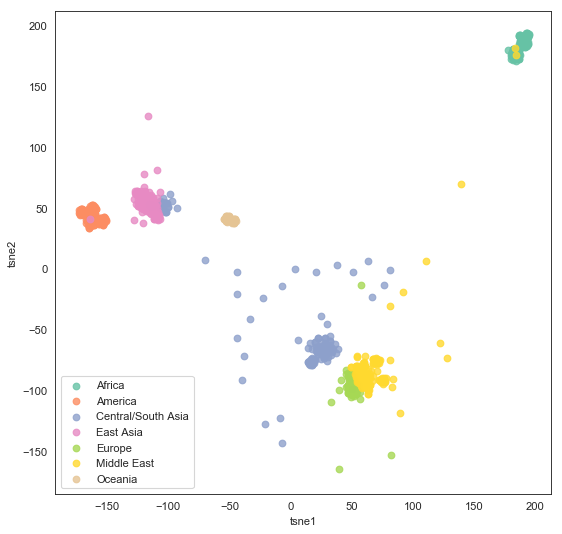

In [277]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8),dpi=80)
for i, c, label in zip(names, colors, names):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=c.reshape(1,-1), label=label,alpha=0.8)
plt.legend(loc=3)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

#### PCA

In [130]:
pca_m=PCA(n_components=2)
pca=pca_m.fit(features)
x_pca=pca_m.transform(features)

In [131]:
print(pca_m.explained_variance_ratio_)

[0.06705061 0.04853613]


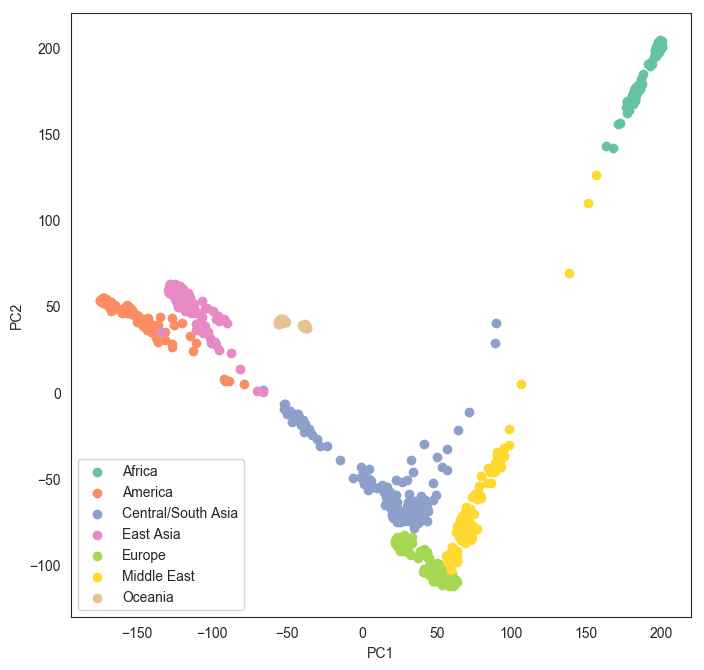

In [310]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8),dpi=100)
for i, c, label in zip(names, colors, names):
    plt.scatter(x_pca[labels == i, 0], x_pca[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend(loc=3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Automatically created module for IPython interactive environment
n_digits: 7, 	 n_samples 1043, 	 n_features 488919
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	250.19s	147483716	0.976	0.975	0.976	0.978	0.976	0.052
random   	228.42s	148003231	0.801	0.839	0.820	0.655	0.818	0.038
PCA-based	29.81s	157121394	0.758	0.921	0.832	0.683	0.830	0.029
__________________________________________________________________________________


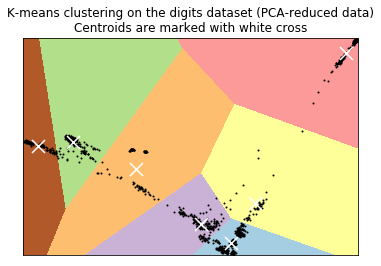

In [134]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data=features
n_samples, n_features = features.shape
n_digits = len(np.unique(labels))

sample_size = 1043

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Incremental PCA

In [136]:
ipca_m = IncrementalPCA(n_components=2, batch_size=100)
ipca=ipca_m.fit(features)
x_ipca=ipca_m.transform(features)

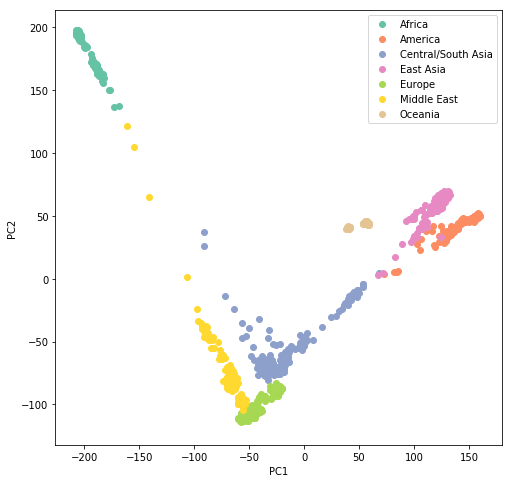

In [247]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_ipca[labels == i, 0], x_ipca[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Kernel PCA

In [264]:
kpca_m = KernelPCA(n_components=2, kernel='rbf')#"linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
x_kpca= kpca_m.fit_transform(features)

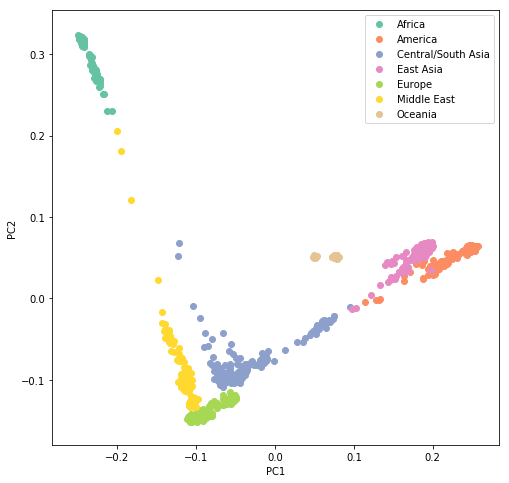

In [265]:
plotpc12(x_kpca)

#### Singular Value Decomposition

In [145]:
svd_m = TruncatedSVD(n_components=2,algorithm='randomized', n_iter=5)
x_svd = svd_m.fit_transform(features)

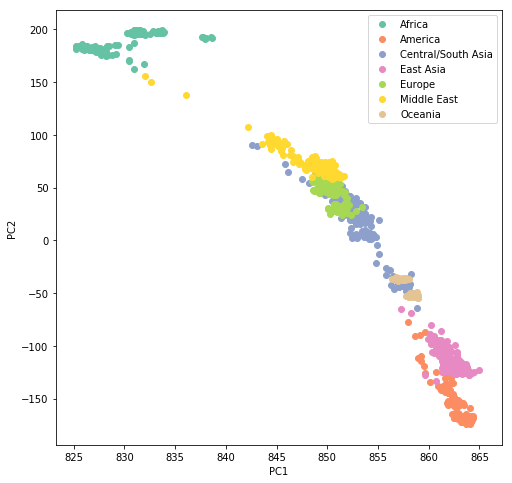

In [250]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_svd[labels == i, 0], x_svd[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Gaussian Random Projection

In [152]:
GRP_m = GaussianRandomProjection(n_components=2)
x_grp = GRP_m.fit_transform(features)

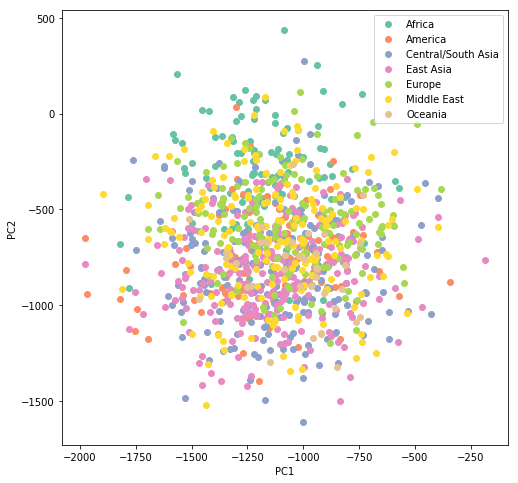

In [251]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_grp[labels == i, 0], x_grp[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Multi Dimensional Scaling [MDS]

In [165]:
mds_m = MDS(n_components=2)
x_mds = mds_m.fit_transform(features)

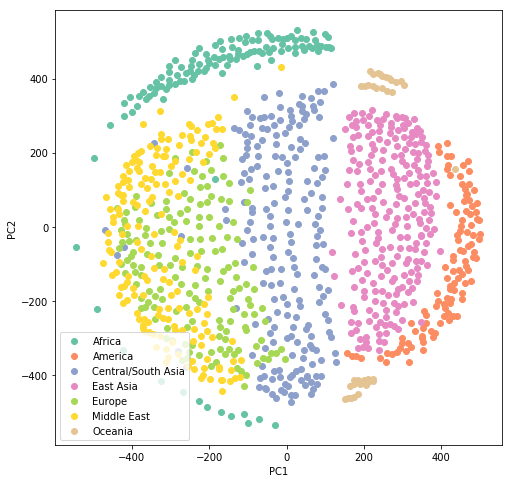

In [252]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_mds[labels == i, 0], x_mds[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### ISOMAP

In [170]:
isomap_m = Isomap(n_components=2)
x_isomap = isomap_m.fit_transform(features)

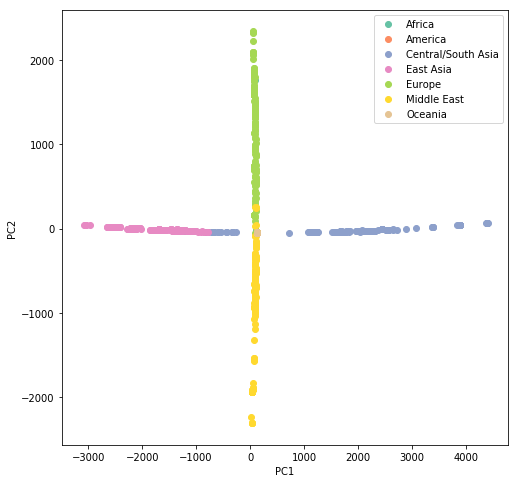

In [253]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_isomap[labels == i, 0], x_isomap[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### MiniBatch Dictionary Learning

In [172]:
mbd_m = MiniBatchDictionaryLearning(n_components=2) 
x_mbd = mbd_m.fit_transform(features)

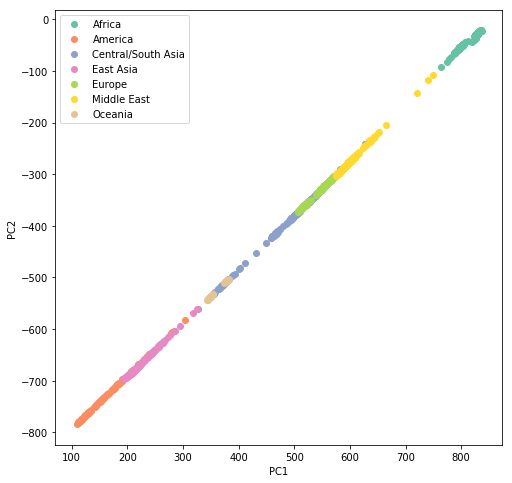

In [254]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_mbd[labels == i, 0], x_mbd[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Independent Composent Analysis [ICA]

In [174]:
fica = FastICA(n_components=2,max_iter = 100) 
x_fica = fica.fit_transform(features)

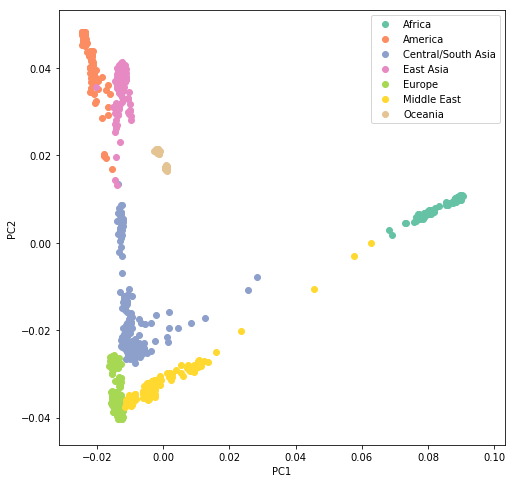

In [255]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8))
for i, c, label in zip(names, colors, names):
    plt.scatter(x_fica[labels == i, 0], x_fica[labels == i, 1], c=c.reshape(1,-1), label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [256]:
def plotpc12(data):
    plt.figure(figsize=(8, 8))
    for i, c, label in zip(names, colors, names):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], c=c.reshape(1,-1), label=label)
    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

#### Locally Linear Embedding [LLE]

In [ ]:
lle = LocallyLinearEmbedding(n_components=2,eigen_solver='dense',n_jobs=4) 
x_lle = lle.fit_transform(features)

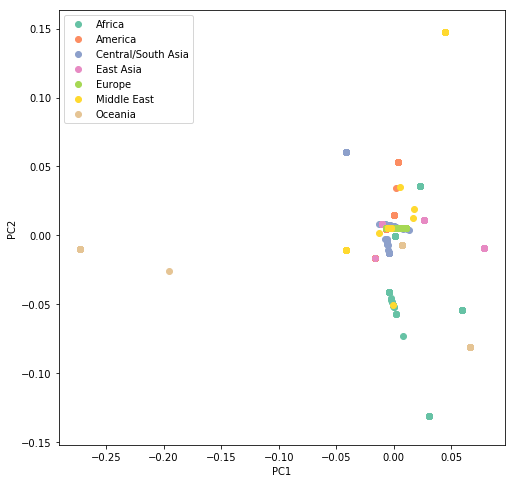

In [257]:
plotpc12(x_lle)

#### Autoencoder

In [15]:
m = Sequential()
m.add(Dense(512,  activation='elu', input_shape=(488919,)))
m.add(Dense(128,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='elu'))
m.add(Dense(512,  activation='elu'))
m.add(Dense(488919,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(features, features, batch_size=128, epochs=5, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(features)
Renc = m.predict(features)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1043/1043 [==============================] - 108s 103ms/step - loss: 0.7200
Epoch 2/5
1043/1043 [==============================] - 75s 72ms/step - loss: 0.6007
Epoch 3/5
1043/1043 [==============================] - 62s 60ms/step - loss: 0.6009
Epoch 4/5
1043/1043 [==============================] - 66s 63ms/step - loss: 0.6009
Epoch 5/5
1043/1043 [==============================] - 67s 65ms/step - loss: 0.6009


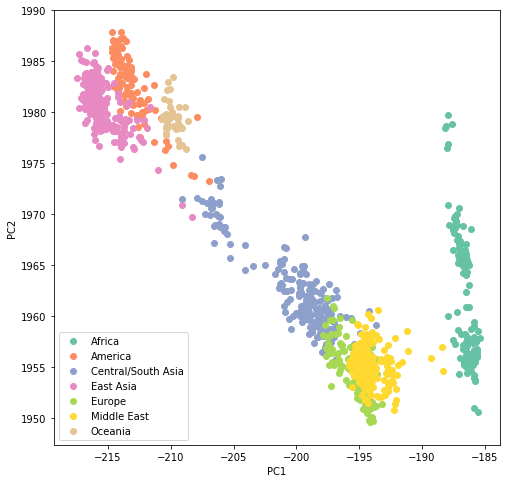

In [258]:
plotpc12(Zenc)

### Random selection

In [308]:
def plotpcsection(data):
    plt.figure(figsize=(8, 8),dpi=100)
    for i, c, label in zip(names, colors, names):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], c=c.reshape(1,-1), label=label)
    plt.legend(loc=3)
    plt.xlabel('PC1'+' '+'(%0.2f%%)'% (100*pca_m.explained_variance_ratio_[0]))
    plt.ylabel('PC2'+' '+'(%0.2f%%)'% (100*pca_m.explained_variance_ratio_[1]))
    plt.show()  

In [305]:
features10000=features.sample(n=10000,axis=1)
features1000=features.sample(n=1000,axis=1)
features100=features.sample(n=100,axis=1)
features10=features.sample(n=10,axis=1)

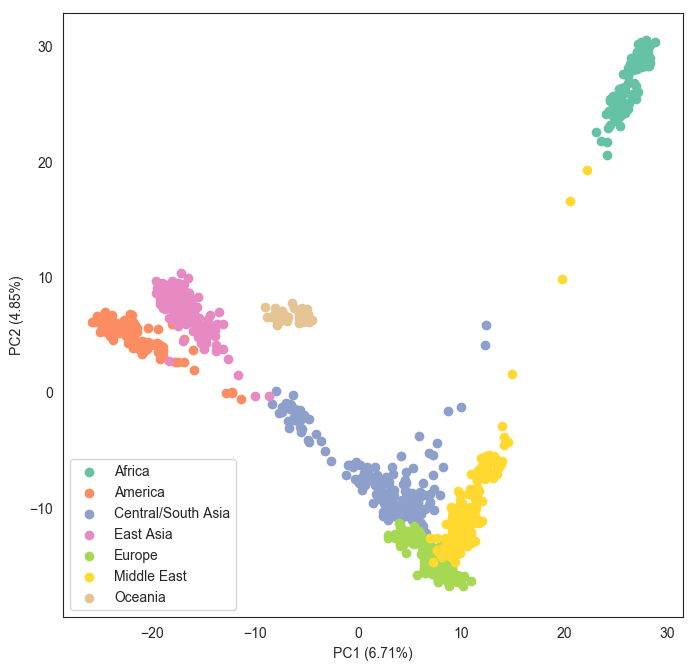

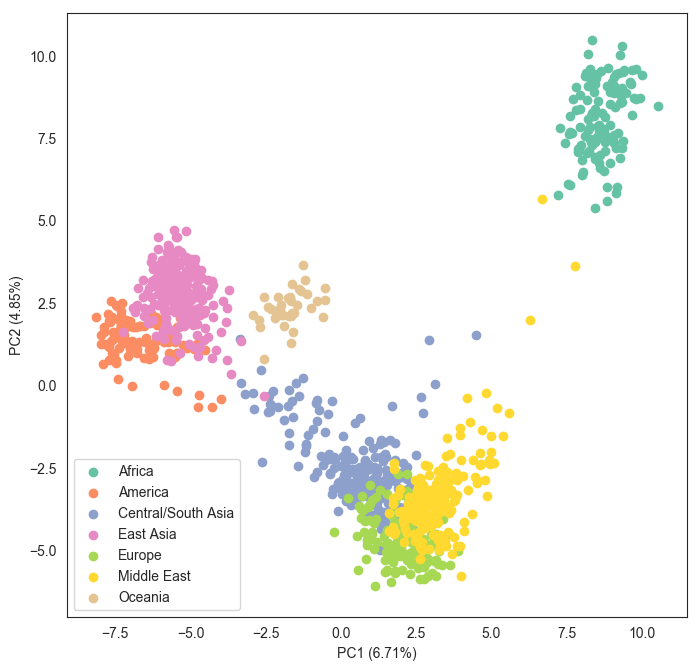

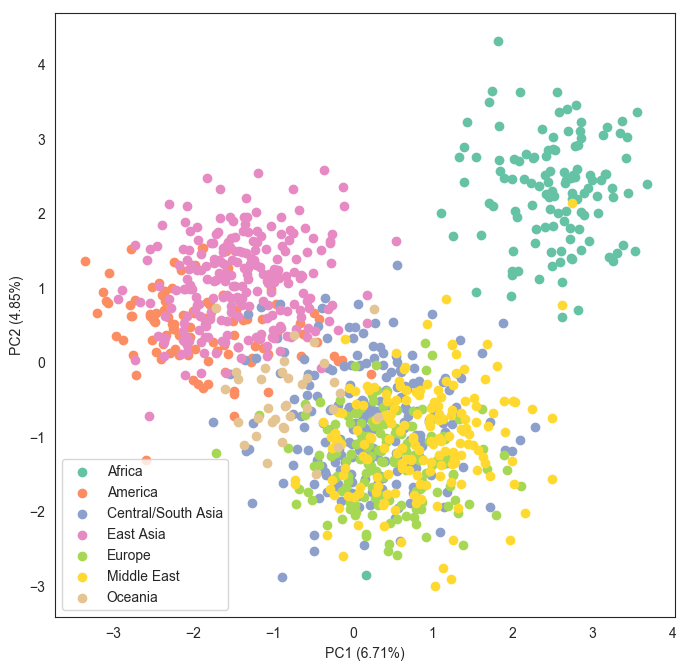

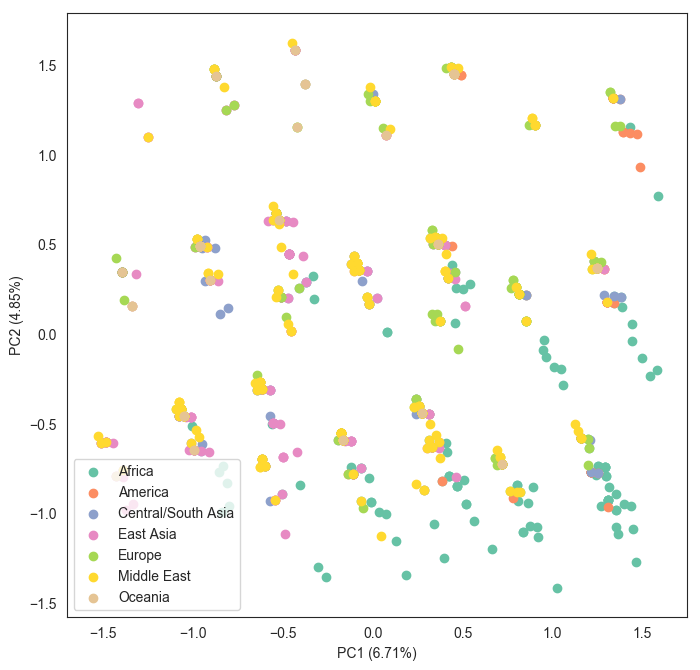

In [309]:
for i in [features10000,features1000,features100,features10]:
    pca_r=PCA(n_components=2)
    x_pcar=pca_r.fit_transform(i)
    plotpcsection(x_pcar)

### Deatiled population analysis

In [19]:
pca_m=PCA(n_components=2)
pca=pca_m.fit(features)
x_pca=pca_m.transform(features)

In [20]:
labels_p=df_clinical['Population']
names_p=np.unique(labels_p)
n_p = len(names_p)
#colors_p = [np.array(plt.cm.Set3(i/n)) for i in range(n)]

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100) 
colors_p = random.choices(all_colors, k=n_p) 

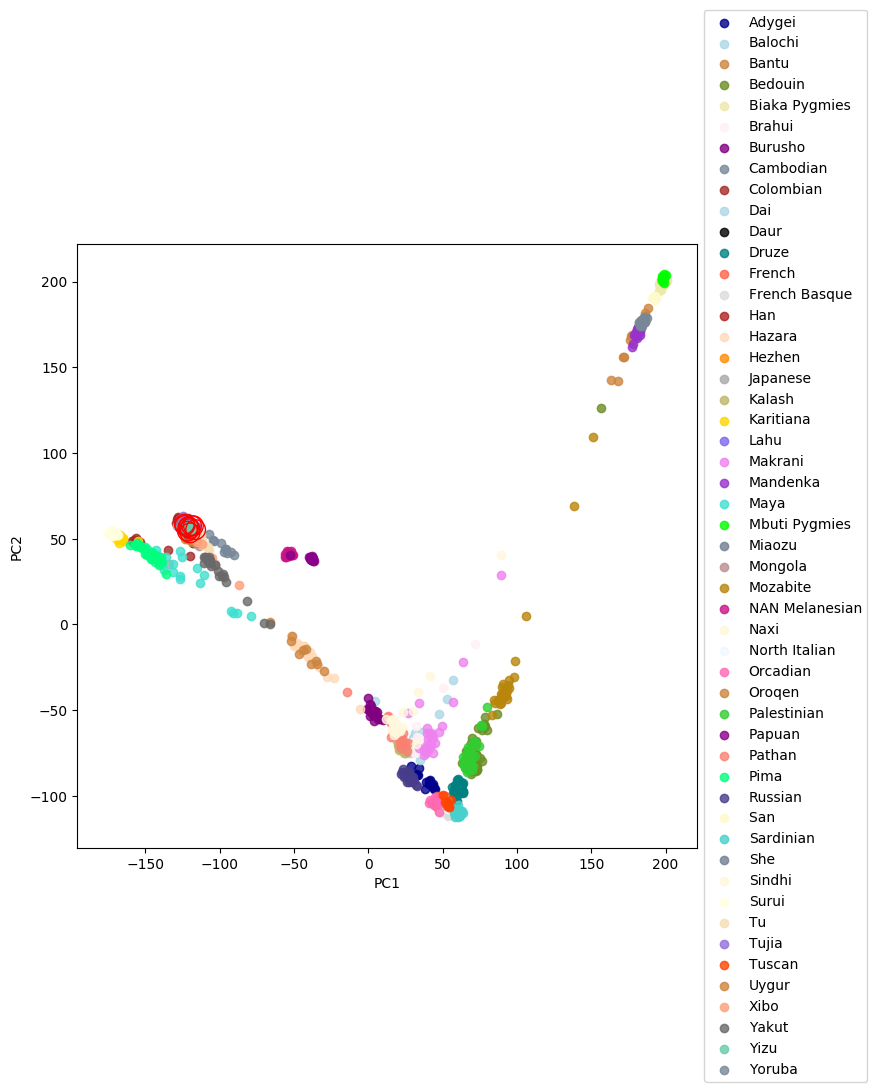

In [330]:
# ax = plt.subplot(111, projection='3d')
plt.figure(figsize=(8, 8),dpi=100)
for i, c, label in zip(names_p, colors_p, names_p):
    plt.scatter(x_pca[labels_p == i, 0], x_pca[labels_p == i, 1], c=c, label=label,alpha=0.8)
# plt.scatter(x_pca[labels_p == "Maya", 0],x_pca[labels_p == "Maya", 1],
#             s=200,
#             facecolors="None",
#             edgecolors="blue")
plt.scatter(x_pca[labels_p == "Yizu", 0],x_pca[labels_p == "Yizu", 1],
            s=200,
            facecolors="None",
            edgecolors="red")
# plt.scatter(x_pca[labels_p == "Yakut", 0],x_pca[labels_p == "Yakut", 1],
#             s=200,
#             facecolors="None",
#             edgecolors="black")
plt.legend(loc="center left"
          , bbox_to_anchor=(1, 0, 0.5, 1) )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Find the threshold p

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [33]:
Y_label=LabelEncoder()
Y_label=Y_label.fit_transform(labels)

In [43]:
interp=pd.concat([pd.DataFrame(Y_label),pd.DataFrame(labels)],axis=1)
interp.columns=["Number","interpretation"]
interp=interp.drop_duplicates(subset=['interpretation'],keep='first')
interp.sort_values(by=['Number'])

,Number,interpretation
0,0,Africa
753,1,America
35,2,Central/South Asia
310,3,East Asia
608,4,Europe
20,5,Middle East
604,6,Oceania


In [50]:
def feature_import(X,y,a):
    fea_import=[*zip(features.columns,RFC(n_estimators=100,random_state=0).fit(X,y).feature_importances_)]
    fea_sort=sorted(fea_import,key = lambda x:x[1],reverse=True)
    fea_sort=pd.DataFrame(fea_sort)
    fea_sort.columns=["SNP","feature importance"]
    top_a=fea_sort.iloc[0:a,:]
    return top_a

In [53]:
df_import=feature_import(features,Y_label,features.shape[1])

In [54]:
df_snp['snp'][df_import['SNP']]

235104     rs2280331
103502    rs12464018
88121     rs12032765
425826     rs7758523
157003      rs155906
             ...    
488914     rs7761056
488915     rs2081188
488916     rs2951747
488917     rs2929374
488918     rs2959523
Name: snp, Length: 488919, dtype: object

In [268]:
top5_name = np.array(df_snp['snp'][df_import['SNP']])[0:5]

top5_index=np.array(df_import['SNP'])[0:5]
top5_index

imp_xxx=RFC_.fit(X,y).feature_importances_

top5_imp=sorted(imp_xxx)[::-1][0:5]

In [111]:
list_impor=sorted(np.unique(RFC_.fit(X,y).feature_importances_))
list_impor=[float(format(x, '.2g')) for x in list_impor]
list_impor=sorted(np.unique(list_impor))
list_impor

[0.0,
 7.5e-06,
 1.1e-05,
 1.2e-05,
 1.5e-05,
 1.6e-05,
 1.7e-05,
 1.8e-05,
 1.9e-05,
 2e-05,
 2.1e-05,
 2.2e-05,
 2.3e-05,
 2.4e-05,
 2.5e-05,
 2.6e-05,
 2.7e-05,
 2.8e-05,
 2.9e-05,
 3e-05,
 3.1e-05,
 3.2e-05,
 3.3e-05,
 3.4e-05,
 3.5e-05,
 3.6e-05,
 3.7e-05,
 3.8e-05,
 3.9e-05,
 4e-05,
 4.1e-05,
 4.2e-05,
 4.3e-05,
 4.4e-05,
 4.5e-05,
 4.6e-05,
 4.7e-05,
 4.8e-05,
 4.9e-05,
 5e-05,
 5.1e-05,
 5.2e-05,
 5.3e-05,
 5.4e-05,
 5.5e-05,
 5.6e-05,
 5.7e-05,
 5.8e-05,
 5.9e-05,
 6e-05,
 6.1e-05,
 6.2e-05,
 6.3e-05,
 6.4e-05,
 6.5e-05,
 6.6e-05,
 6.7e-05,
 6.8e-05,
 6.9e-05,
 7e-05,
 7.1e-05,
 7.2e-05,
 7.3e-05,
 7.4e-05,
 7.5e-05,
 7.6e-05,
 7.7e-05,
 7.8e-05,
 7.9e-05,
 8e-05,
 8.1e-05,
 8.2e-05,
 8.3e-05,
 8.4e-05,
 8.5e-05,
 8.6e-05,
 8.7e-05,
 8.8e-05,
 8.9e-05,
 9e-05,
 9.1e-05,
 9.2e-05,
 9.3e-05,
 9.4e-05,
 9.5e-05,
 9.6e-05,
 9.7e-05,
 9.8e-05,
 9.9e-05,
 0.0001,
 0.00011,
 0.00012,
 0.00013,
 0.00014,
 0.00015,
 0.00016,
 0.00017,
 0.00018,
 0.00019,
 0.0002,
 0.00021,
 0.00022,
 0

In [117]:
RFC_=RFC(random_state=0)
d_s=[]
X=features
y=Y_label

# threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),50)
#threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),100)

score_s = []
for i in d:
    print(i)
    n=random.sample(range(X.shape[1]),i)
    X_embedded = X.iloc[:,n]
    d_s.append(X_embedded.shape[1])
    print(X_embedded.shape[1])
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score_s.append(once)
    print(once)

488919
488919
0.9625736105999264
10895
10895
0.9424641148325359
10893
10893
0.9434118513065883
10160
10160
0.9299917188075082
10160
10160
0.9395564961354435
9599
9599
0.9376426205373575
9599
9599
0.9347764078027234
9225
9225
0.9347764078027236
9085
9085
0.9357241442767759
8945
8945
0.9405364372469636
8705
8705
0.9414887743835113
8278
8278
0.9433980493191021
7627
7627
0.9443411851306587
7443
7443
0.9242224880382774
7413
7413
0.9328487302171512
7400
7400
0.937684026499816
7310
7310
0.9491534781008465
7128
7128
0.9328533308796467
7085
7085
0.9338194700036805
6986
6986
0.9386225616488775
6804
6804
0.9299549135075452
6725
6725
0.9405456385719543
6604
6604
0.9319055944055943
6504
6504
0.9280456385719542
6408
6408
0.933847073978653
6353
6353
0.9280456385719544
6308
6308
0.9463010673536989
6235
6235
0.9347626058152374
6169
6169
0.9261593669488407
6037
6037
0.9290301803459698
5973
5973
0.9261363636363636
5844
5844
0.9347764078027236
5722
5722
0.9261777695988223
5528
5528
0.9405318365844682
5403

In [177]:
ds_com=pd.concat([pd.DataFrame(d),pd.DataFrame(score),pd.DataFrame(score_s)],axis=1)

ds_com.columns=['d','importance','random']

d_index=[488919,10160,7085,6504,2098,1007,944,775,663,580,547,524,512,404,300,203,104,44,8,1]#

ds_com=ds_com.loc[ds_com["d"].isin(d_index),:]

ds_com.index=range(len(ds_com["d"]))

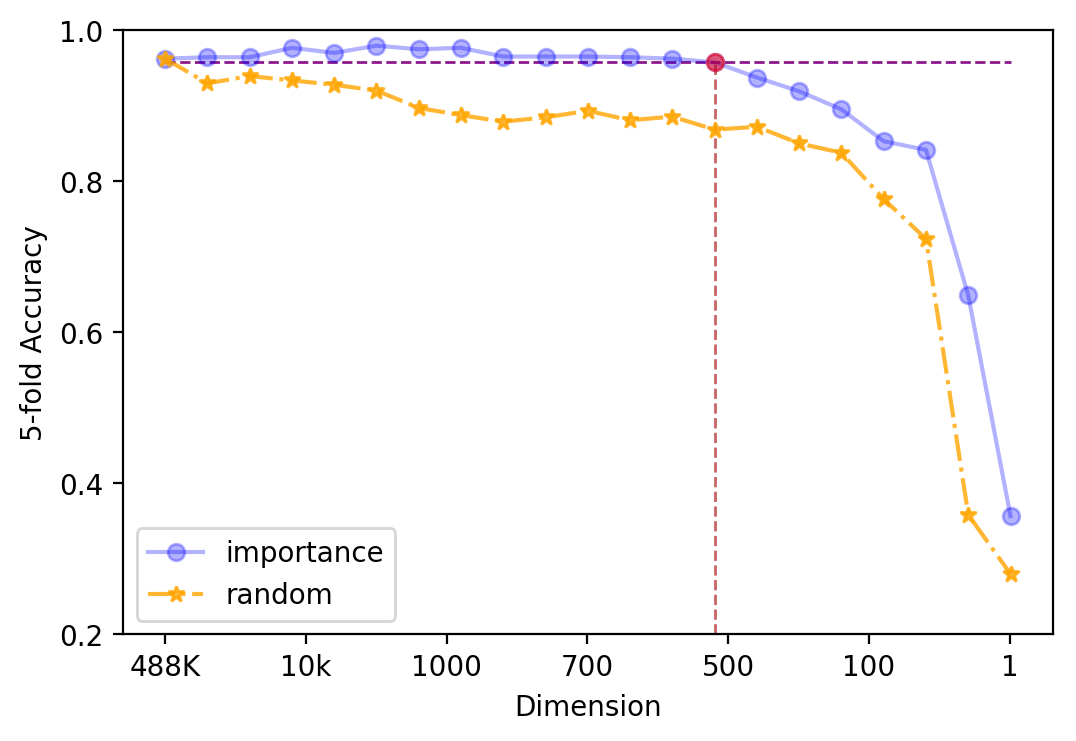

In [334]:
fig, ax = plt.subplots(figsize=(6,4), dpi= 200)

ax.hlines(0.957780
          , xmin=0 
          , xmax= len(ds_com["d"])-1
          , color='purple', alpha=0.9, linewidth=1,linestyles = "dashed")
ax.vlines(13
          , ymin=0.2
          , ymax=0.957780
          , color='firebrick', alpha=0.7, linewidth=1,linestyles = "dashed")
ax.plot(range(len(ds_com["d"])), ds_com.importance, marker=r'o', color='blue',alpha=0.3, linestyle='-')
ax.plot(range(len(ds_com["d"])), ds_com.random, marker=r'*', color='orange',alpha=0.8, linestyle='-.')
ax.plot(13,0.957780, 'ro',alpha=0.5)

#x_label=['400K','','','',
#        '100K','','','',
#        '1000','','','',
#        '100','','','',
#        '10','','','1']
x_label=['488K','10k','1000','700','500','100','1']
y_label=['0.2','0.4','0.6','0.8','1.0']
plt.xticks(np.arange(0,21,3.33), x_label)
plt.yticks(np.arange(0.2,1.2,0.2),y_label)

ax.legend(loc=3 )
#ax.set_xticklabels(, fontdict={'horizontalalignment': 'right',"size":20})
ax.set_xlabel('Dimension',fontsize=10)
ax.set_ylabel('5-fold Accuracy',fontsize=10)
ax.set_xlim(-1,21)
ax.set_ylim(0.2,1)
plt.show()

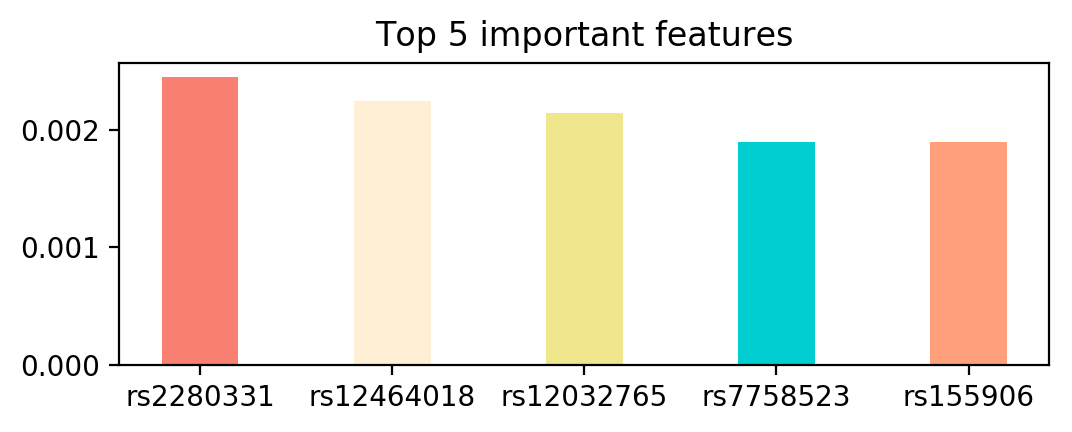

In [333]:
rand_colors = list(plt.cm.colors.cnames.keys())
random.seed(0) 
color_imp = random.choices(rand_colors, k=5) 

plt.figure(figsize=(6,2), dpi= 200)
plt.bar(top5_name, top5_imp, color=color_imp, width=.4) #width 0-1

#for i, val in enumerate(df['counts'].values):
#    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

#plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Top 5 important features", fontsize=12)
#plt.ylabel('# Vehicles')
#plt.ylim(0, 45)
plt.show()

In [329]:
one_top_feature=features[top5_index]

data_top5 = pd.concat([one_top_feature, labels], axis=1)
col_name=[]
col_name.extend(top5_name)
col_name.append('label')
data_top5.columns= col_name
data_top5.to_csv("top5.csv",index=None)

### Case study

In [ ]:
labels_c=df_clinical['Geographic.origin']
labels_p=df_clinical['Population']
names_c=np.unique(labels_c)
n_c = len(names_c)
#colors_p = [np.array(plt.cm.Set3(i/n)) for i in range(n)]

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100) 
colors_p = random.choices(all_colors, k=n_c)

plt.figure(figsize=(8, 8),dpi=100)
for i, c, label in zip(names_c, colors_p, names_c):
    plt.scatter(x_pca[labels == i, 0], x_pca[labels == i, 1], c=c, label=label,alpha=0.8)
plt.scatter(x_pca[labels_c == "China", 0],x_pca[labels_c == "China", 1],
            s=200,
            facecolors="None",
            edgecolors="blue")
plt.scatter(x_pca[labels_p == "Uygur", 0],x_pca[labels_p == "Uygur", 1],
            s=200,
            facecolors="None",
            edgecolors="red")
#plt.scatter(x_pca[labels_p == "Yoruba", 0],x_pca[labels_p == "Yoruba", 1],
#            s=200,
#            facecolors="None",
#            edgecolors="black")
plt.legend(loc="center left"
          , bbox_to_anchor=(1, 0, 0.5, 1) )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

result_tsn = df_clinical
result_tsn['tsne-pca50-one'] = tsne_pca_results[:,0]
result_tsn['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue='region',
    palette=sns.color_palette("hls", 7),
    data=result_tsn,
    legend="full",
    alpha=0.3
)

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    data=result_tsn[result_tsn['Geographic.origin']=='China'],
    hue='Population',
    legend='full'
)